In [1]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

### From Darksky

In [85]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
import time
import datetime

### Find UV

In [3]:
def get_uv(driver,lat,lon,dat,ticks):
    driver.get(f'https://darksky.net/details/{lat},{lon}/{dat}/us12/en')
    uv = []
    for tick in ticks:
        hour = driver.find_element_by_xpath(f'//span[{tick}]')
        ActionChains(driver).move_to_element(hour).click(hour).perform()
        nums = driver.find_elements_by_class_name('num')
        try:
            uv.append(int(nums[7].text))
        except:
            uv.append(0)
    return uv

In [4]:
ticks1 = [
    '@class="even first" and @style="left: 0px;"',
    '@class="odd second" and @style="left: 33.3333px;"',
    '@class="even" and @style="left: 66.6667px;"',
    '@class="odd" and @style="left: 100px;"',
    '@class="even" and @style="left: 133.333px;"',
    '@class="odd" and @style="left: 166.667px;"',
    '@class="even" and @style="left: 200px;"',
    '@class="odd" and @style="left: 233.333px;"',
    '@class="even" and @style="left: 266.667px;"',
    '@class="odd" and @style="left: 300px;"',
    '@class="even" and @style="left: 333.333px;"',
    '@class="odd" and @style="left: 366.667px;"',
    '@class="even" and @style="left: 400px;"',
    '@class="odd" and @style="left: 433.333px;"',
    '@class="even" and @style="left: 466.667px;"',
    '@class="odd" and @style="left: 500px;"',
    '@class="even" and @style="left: 533.333px;"',
    '@class="odd" and @style="left: 566.667px;"',
    '@class="even" and @style="left: 600px;"',
    '@class="odd" and @style="left: 633.333px;"',
    '@class="even" and @style="left: 666.667px;"',
    '@class="odd" and @style="left: 700px;"',
    '@class="even" and @style="left: 733.333px;"',
    '@class="odd" and @style="left: 766.667px;"',
]

In [5]:
ticks2 = [
    '@class="even first" and @style="left: 0px;"',
    '@class="odd second" and @style="left: 34.7826px;"',
    '@class="even" and @style="left: 69.5652px;"',
    '@class="odd" and @style="left: 104.348px;"',
    '@class="even" and @style="left: 139.13px;"',
    '@class="odd" and @style="left: 173.913px;"',
    '@class="even" and @style="left: 208.696px;"',
    '@class="odd" and @style="left: 243.478px;"',
    '@class="even" and @style="left: 278.261px;"',
    '@class="odd" and @style="left: 313.043px;"',
    '@class="even" and @style="left: 347.826px;"',
    '@class="odd" and @style="left: 382.609px;"',
    '@class="even" and @style="left: 417.391px;"',
    '@class="odd" and @style="left: 452.174px;"',
    '@class="even" and @style="left: 486.957px;"',
    '@class="odd" and @style="left: 521.739px;"',
    '@class="even" and @style="left: 556.522px;"',
    '@class="odd" and @style="left: 591.304px;"',
    '@class="even" and @style="left: 626.087px;"',
    '@class="odd" and @style="left: 660.87px;"',
    '@class="even" and @style="left: 695.652px;"',
    '@class="odd" and @style="left: 730.435px;"',
    '@class="even" and @style="left: 765.217px;"',
]

### Single site over date range
- San Luis Obispo solar field (SLO)
- From march 

In [57]:
early_date = '03/07/2020'
later_date = '03/09/2020'

dates = pd.date_range(early_date, later_date).tolist()
dates = [date.strftime("%Y-%m-%d") for date in dates]

In [61]:
driver = webdriver.Chrome(ChromeDriverManager().install())

uv_list = []

for date in dates:
    try:
        nu_uv = get_uv(driver,str(35.376175),str(-120.061942),date,ticks1)
        hours = pd.date_range(start=date+' 00:00:00',end=date+' 23:00:00', periods=24)
    except:
        nu_uv = get_uv(driver,str(35.376175),str(-120.061942),date,ticks2)
        hours = pd.date_range(start=date+' 00:01:00',end=date+' 23:00:00', periods=23)
    nu_df = pd.DataFrame({'date':hours,'uv':nu_uv})
    uv_list.append(nu_df)

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


In [36]:
slo_uv = pd.concat(uv_list)

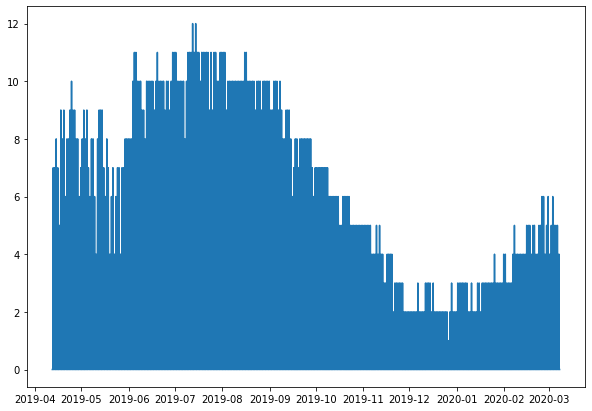

In [41]:
plt.figure(figsize=(10,7))
plt.plot(slo_uv['date'],slo_uv['uv'])

In [42]:
slo_uv.to_csv('datasets/time_series/slo_uv.csv',index=False)

In [24]:
uvdf = pd.concat(uv_list)
uvdf.shape

(240, 2)

### Get clustered solar plant weather data

In [60]:
plants = pd.read_csv('datasets/solar_clusters.csv')
print(plants.shape)
plants.head()

(30, 3)


,Longitude,Latitude,MW
0,-120.266187,36.543670,766.100000
1,-117.213832,34.000467,103.090000
2,-115.612158,32.885355,1637.707195
3,-118.296688,34.748518,2308.260000
4,-121.304171,38.434039,155.110000


In [87]:
early_date = '04/16/2020'
later_date = '05/21/2020'

dates = pd.date_range(early_date, later_date).tolist()
dates = [date.strftime("%Y-%m-%d") for date in dates]

In [88]:
#### PRINT INITIAL TIME STAMP ######
ts1 = time.time()
st1 = datetime.datetime.fromtimestamp(ts1).strftime('%Y-%m-%d %H:%M:%S')
print(st1)


driver = webdriver.Chrome(ChromeDriverManager().install())

df_list = []

for i in range(plants.shape[0]):
    pid = plants.index[i]
    lat = plants['Latitude'][i]
    lon = plants['Longitude'][i]
    
    uv_list = []
    hr_list = []
    
    for date in dates:
        try:
            nu_uv = get_uv(driver,str(lat),str(lon),date,ticks1)
            hours = pd.date_range(start=date+' 00:00:00',end=date+' 23:00:00', periods=24)
            uv_list.extend(nu_uv)
            hr_list.extend(hours)
        except:
            try:
            
                time.sleep(5)
                nu_uv = get_uv(driver,str(lat),str(lon),date,ticks1)
                hours = pd.date_range(start=date+' 00:00:00',end=date+' 23:00:00', periods=24)
                uv_list.extend(nu_uv)
                hr_list.extend(hours)
            
            except:
            
                time.sleep(5)
                nu_uv = get_uv(driver,str(lat),str(lon),date,ticks2)
                hours = pd.date_range(start=date+' 01:00:00',end=date+' 23:00:00', periods=23)
                uv_list.extend(nu_uv)
                hr_list.extend(hours)
            
    nu_df = pd.DataFrame({'date':hr_list,pid:uv_list})

    if i == 0:
        all_df = nu_df.copy()
    else:
        all_df = all_df.merge(nu_df,how='outer',on='date')

##### PRINT FINAL TIME STAMP #######
ts2 = time.time()
st2 = datetime.datetime.fromtimestamp(ts2).strftime('%Y-%m-%d %H:%M:%S')
print(st2)
print('t(s) = ' + str(ts2-ts1))
print('t(m) = ' + str((ts2-ts1)/60))

[WDM] - Cache is valid for [02/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


2020-06-02 22:20:01
 


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//span[@class="even first" and @style="left: 0px;"]"}
  (Session info: chrome=83.0.4103.61)


(768, 31)


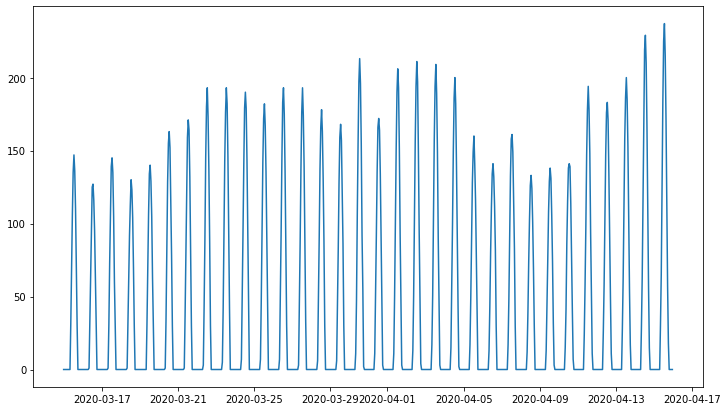

In [78]:
print(all_df.shape)
plt.figure(figsize=(12,7))
plt.plot(all_df['date'],all_df.sum(axis=1))

### Combine plant capacity with UV index

In [84]:
all_df.tail()

,date,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
763,2020-04-15 19:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
764,2020-04-15 20:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,2020-04-15 21:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,2020-04-15 22:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
767,2020-04-15 23:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
uv_output = all_df.copy()

for col in all_df.columns:
    if col != 'date':
        uv_output[col] = all_df[col]*plants['MW'][int(col)]

In [83]:
uv_output.to_csv('datasets/time_series/solar_cluster.csv',index=False)

In [4]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://darksky.net/details/35.5912,-115.427/2020-7-2/us12/en')

wind = []
uv = []

for tick in ticks:
    hour = driver.find_element_by_xpath(f'//span[{tick}]')
    ActionChains(driver).move_to_element(hour).click(hour).perform()
    nums = driver.find_elements_by_class_name('num')
    try:
        wind.append(int(nums[3].text))
    except:
        wind.append(0)
    try:
        uv.append(int(nums[7].text))
    except:
        uv.append(0)

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


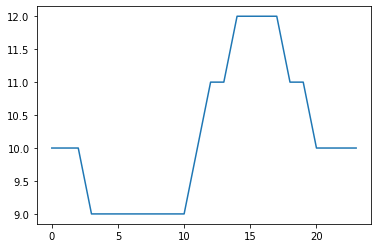

In [5]:
plt.plot(wind)

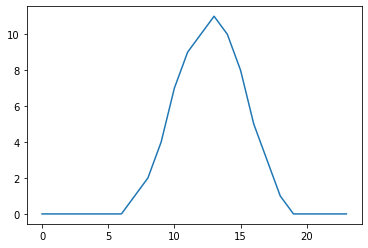

In [6]:
plt.plot(uv)

In [7]:
len(uv)

24

In [57]:
solar[solar['MW']>=20]['MW'].sum()/solar['MW'].sum()

0.8578307578326047